# Interpolator Error Calculator

## Imports and Path Settings

In [1]:
import struct
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from scipy.interpolate import griddata
from netCDF4 import Dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
REAL_PATH = Path.cwd()/'../Data/Interpolations'
FORECASTED_PATH = Path.cwd()/'../Data/SPEEDY'
FIGURES_PATH = Path.cwd()/'../Figures'

In [3]:
REAL_FILES = [k.name for k in REAL_PATH.rglob('*.grd')]
FORECASTED_FILES = [k.name for k in FORECASTED_PATH.rglob('*.grd')]

In [4]:
nlon = 96;
nlat = 48;
nlev = 7;

In [5]:
def read_grd(source,i):
    ## 1 Forecast, 0 Real
    if(source):
        filename = FORECASTED_PATH/FORECASTED_FILES[i]
    else:
        filename = REAL_PATH/REAL_FILES[i]
    
    infile = open(filename, "rb")    
    data = np.fromfile(infile , '>f4')
    l = 0
    U = np.empty([nlev,nlat,nlon])
    for k in range(nlev):
        for j in range(nlat):
            for i in range(nlon):
                U[k,j,i] = data[l]
                l=l+1

    V = np.empty([nlev,nlat,nlon])
    for k in range(nlev):
        for j in range(nlat):
            for i in range(nlon):
                V[k,j,i] = data[l]
                l=l+1

    T = np.empty([nlev,nlat,nlon])
    for k in range(nlev):
        for j in range(nlat):
            for i in range(nlon):
                T[k,j,i]  = data[l]
                l=l+1

    SH = np.empty([nlev,nlat,nlon])
    for k in range(nlev):
        for j in range(nlat):
            for i in range(nlon):
                SH[k,j,i] = data[l]
                l=l+1


    P = np.empty([nlat,nlon])
    for j in range(nlat):#range(nlat-1,-1,-1): #range(nlat):
        for i in range(nlon):
            P[j,i] = data[l]
            l=l+1
    return U,V,T,SH,P

In [ ]:
def Error_plots(true_noaa, forcast_speedy,variable_name):
    #true_noaa_array = np.reshape(true_noaa ,(96,48))
    #forcast_speedy_array = np.reshape(forcast_speedy ,(96,48))
    RMSE = mean_squared_error(true_noaa, forcast_speedy)
    MSE = mean_absolute_error(true_noaa, forcast_speedy)
    plt.figure(figsize=(16,28))
    ax1 = plt.subplot(311)
    ax1 = plt.contourf(true_noaa)
    ax1 = plt.title("TRUE VALUES - NOAA")
    ax2 = plt.subplot(312)
    ax2 = plt.contourf(forcast_speedy)
    ax2 = plt.title("SPEEDY FORECAST")
    ax3 = plt.subplot(313)
    ax3 = plt.contourf(np.abs(true_noaa-forcast_speedy))
    ax3 = plt.title("ABS TRUE NOAA - FORCAST SPEEDY (ERRORS)")
    plt.colorbar()
    plt.gcf().savefig(FIGURES_PATH/(variable_name+'.eps'), format='eps')
    plt.gcf().savefig(FIGURES_PATH/(variable_name+'.png'), format='png')
    plt.show()
    print("RMSE:",RMSE, "MSE:", MSE)
    return RMSE, MSE

In [ ]:
Error_plots(T_NOAA[0,:,:], T_SPEEDY[0,:,:],'temperature-925-'+REAL_FILES[0][:-4])

In [ ]:

filename = FORECASTED_PATH/FORECASTED_FILES[0]
infile = open(filename, "rb")    
data = np.fromfile(infile , '>f4')

l = 0
U_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            U_SPEEDY[k,j,i] = data[l]
            l=l+1
            
V_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            V_SPEEDY[k,j,i] = data[l]
            l=l+1
            
T_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            T_SPEEDY[k,j,i]  = data[l]
            l=l+1
            
SH_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            SH_SPEEDY[k,j,i] = data[l]
            l=l+1
    
    
P_SPEEDY = np.empty([nlat,nlon])
for j in range(nlat):#range(nlat-1,-1,-1): #range(nlat):
    for i in range(nlon):
        P_SPEEDY[j,i] = data[l]
        l=l+1

In [ ]:
data_list = list(U_SPEEDY.ravel()) + list(V_SPEEDY.ravel()) + list(T_SPEEDY.ravel()) + list(SH_SPEEDY.ravel()) + list(P_SPEEDY.ravel())

In [ ]:
data == data_list
np.array_equal(data,data_list)

In [6]:
datasets_NOAA = dict()
for i,val in enumerate(['00','06','12','18']):
    [U_NOAA,V_NOAA,T_NOAA,SH_NOAA,P_NOAA] = read_grd(0,i)
    variables_NOAA = dict()
    variables_NOAA['uwnd'] = U_NOAA
    variables_NOAA['vwnd'] = V_NOAA
    variables_NOAA['temperature'] = T_NOAA
    variables_NOAA['shum'] = SH_NOAA
    variables_NOAA['pres'] = P_NOAA
    datasets_NOAA[val] = variables_NOAA

In [7]:
datasets_SPEEDY = dict()
for i,val in enumerate(['00','06','12','18']):
    [U_SPEEDY,V_SPEEDY,T_SPEEDY,SH_SPEEDY,P_SPEEDY] = read_grd(1,i)
    variables_SPEEDY = dict()
    variables_SPEEDY['uwnd'] = U_SPEEDY
    variables_SPEEDY['vwnd'] = V_SPEEDY
    variables_SPEEDY['temperature'] = T_SPEEDY
    variables_SPEEDY['shum'] = SH_SPEEDY
    variables_SPEEDY['pres'] = P_SPEEDY
    datasets_SPEEDY[val] = variables_SPEEDY

In [8]:
variables_keys = list(datasets_SPEEDY['00'].keys())[:-1]
variables_keys

['uwnd', 'vwnd', 'temperature', 'shum']

In [ ]:
times=FORECASTED_FILES
plt.figure(figsize=(16,8))
plt.suptitle('LOG10(MSE) for July 1st',size=18)
times=['00:00','06:00','12:00','18:00']

for j,var in enumerate(variables_keys):
    MSE = np.zeros((7,4))
    for i,hour in enumerate(['00','06','12','18']):
        for press,pressure_level in enumerate([925,850,700,500,300,200,100]):
            MSE[press,i] = mean_squared_error(
                datasets_NOAA[hour][var][press,:,:],
                datasets_SPEEDY[hour][var][press,:,:])/np.linalg.norm(datasets_NOAA[hour][var][press,:,:])

In [ ]:
MSE[:,0]

In [34]:
import matplotlib
matplotlib.rcParams["mathtext.fontset"] = 'cm'

matplotlib.rcParams.update({'font.size': 14})

C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\randyc\Anaconda3\envs\cases\lib\site-packages\ipykernel_laun

<function matplotlib.pyplot.show(close=None, block=None)>

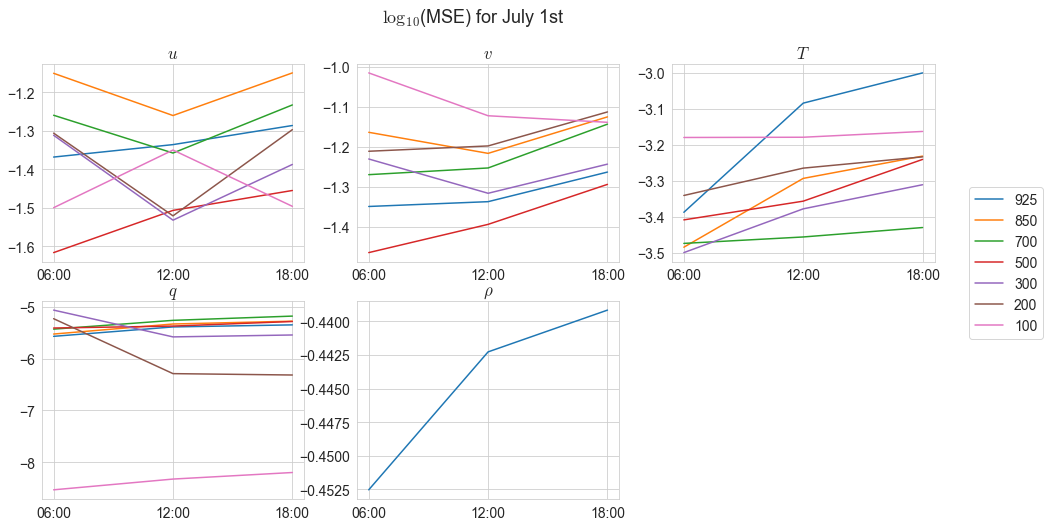

In [92]:
times=FORECASTED_FILES

fig = plt.figure(figsize=(16,8))
fig.suptitle('$\log_{10}$(MSE) for July 1st',size=18)

times=['00:00','06:00','12:00','18:00']
symbols = [r'$\mathit{u}$',r'$v$','$T$','$q$','$\\rho$']

for j,var in enumerate(variables_keys):
    MSE = np.zeros((7,4))
    for i,hour in enumerate(['00','06','12','18']):
        for press,pressure_level in enumerate([925,850,700,500,300,200,100]):
            MSE[press,i] = mean_squared_error(
                datasets_NOAA[hour][var][press,:,:],
                datasets_SPEEDY[hour][var][press,:,:])/np.linalg.norm(datasets_NOAA[hour][var][press,:,:])
             
    plt.subplot(2,3,j+1)
    sns.set_style('whitegrid')
    
    for press,pressure_level in enumerate([925,850,700,500,300,200,100]):
        plt.plot(times,np.log10(MSE[press,:]),label=pressure_level)
        plt.title(symbols[j])    
    
#plt.legend()
MSE_pressure=list()

for i,hour in enumerate(['00','06','12','18']):
    MSE_pressure.append(
        mean_squared_error(
            datasets_NOAA[hour]['pres'][:,:],
            datasets_SPEEDY[hour]['pres'][:,:])/np.linalg.norm(datasets_NOAA[hour]['pres'][:,:]))

plt.subplot(2,3,5)
sns.set_style('whitegrid')
plt.plot(times,np.log10(MSE_pressure))
plt.title('$\\rho$')
fig.legend([925,850,700,500,300,200,100],loc = "center right")
plt.show

In [ ]:
times=FORECASTED_FILES
plt.figure(figsize=(16,8))
plt.suptitle('LOG10(MSE) for July 1st',size=18)
times=['00:00','06:00','12:00','18:00']

for press,pressure_level in enumerate([925,850,700,500,300,200,100]):
    MSE = np.zeros((4,4))
    for i,hour in enumerate(['00','06','12','18']):
        for j,var in enumerate(variables_keys):
            MSE[i,j] = mean_squared_error(
                datasets_NOAA[hour][var][press,:,:],
                datasets_SPEEDY[hour][var][press,:,:])/np.linalg.norm(datasets_NOAA[hour][var][press,:,:])
             
    plt.subplot(2,4,press+1)
    sns.set_style('whitegrid')
    for i in range(len(variables_keys)):
        plt.plot(times,np.log10(MSE[:,i]),label=variables_keys[i])
        plt.title('pressure level='+str(pressure_level))    
    plt.legend()

    

MSE_pressure=list()

for i,hour in enumerate(['00','06','12','18']):
    MSE_pressure.append(
        mean_squared_error(
            datasets_NOAA[hour]['pres'][:,:],
            datasets_SPEEDY[hour]['pres'][:,:])/np.linalg.norm(datasets_NOAA[hour]['pres'][:,:]))

plt.subplot(2,4,8)
sns.set_style('whitegrid')
plt.plot(times,np.log10(MSE_pressure))
plt.title('pressure surface level')
plt.show

In [ ]:
times=FORECASTED_FILES
plt.figure(figsize=(16,8))
plt.suptitle('MSE for July 1st',size=18)

for i,pressure_level in enumerate([925,850,700,500,300,200,100]):
    MSE = np.zeros(4)
    for i,hour in enumerate(['00','06','12','18']):
        for j,var in enumerate(variables_keys):
            MSE[i,j] = mean_squared_error(real[j],prediction[j])

    
    
    plt.subplot(2,4,i+1)
    sns.set_style('whitegrid')
    for i in range(len(variables_keys)):
        plt.plot(times,np.log10(MSE[:,i]),label=variables_keys[i])
        plt.title('pressure level='+str(Ppressure_level))    
    plt.legend()

MSE_pressure=list()

for prediction,real in zip(pressure_Markovian_predictions,
                               pressure_Markovia_true_values):
    MSE_pressure.append(mean_squared_error(real,prediction))

plt.subplot(2,4,8)
sns.set_style('whitegrid')
plt.plot(times,np.log10(MSE_pressure))
plt.title('pressure surface level')
plt.show


In [ ]:
import subprocess

list_files = subprocess.run(["wsl","ls"])
print("The exit code was: %d" % list_files.returncode)

In [ ]:
list_files.stdout